<a href="https://colab.research.google.com/github/matsunagalab/tutorial_analyzingMDdata/blob/main/03_md_geometry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geometry analysis

## MDTrajのインストール

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:24
🔁 Restarting kernel...


In [1]:
!conda install -c conda-forge mdtraj

Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mdtraj


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    astunparse-1.6.3           |     pyhd8ed1ab_0          15 KB  conda-forge
    blosc-1.21.5               |       hc2324a3_1          48 KB  conda-forge
    c-blosc2-2.14.4            |       hb4ffafa_1         329 KB  conda-forge
    ca-certificates-2024.8.30  |       hbcca054_0         155 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    hdf5-1.14.3                |nompi_h4f84152_100         3.7 MB  conda-forge
    libaec-1.

## T4 LysozymeのMDデータの取得

`wildtype.pdb` と `wildtype.dcd` をダウンロードする。

In [2]:
!gdown 1Lu22Z7ARKSws77sBaYr84iCcQsnTHId9
!gdown 1Eh0SSSxgAmv7LI2NvAY43tLMLI63lSa-

Downloading...
From: https://drive.google.com/uc?id=1Lu22Z7ARKSws77sBaYr84iCcQsnTHId9
To: /content/wildtype.pdb
100% 214k/214k [00:00<00:00, 78.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Eh0SSSxgAmv7LI2NvAY43tLMLI63lSa-
From (redirected): https://drive.google.com/uc?id=1Eh0SSSxgAmv7LI2NvAY43tLMLI63lSa-&confirm=t&uuid=34f269ad-08ab-49bf-a2fa-00ba8474ec11
To: /content/wildtype.dcd
100% 318M/318M [00:01<00:00, 254MB/s]


## MDTrajを使ってgeometry analysis

Geometry関連の関数は[ドキュメント](https://www.mdtraj.org/1.9.7/analysis.html)から確認することができます。ここではいくつかを紹介します。

In [3]:
import mdtraj as md
import numpy as np

traj = md.load('/content/wildtype.dcd', top='/content/wildtype.pdb')

原子間距離を計算します

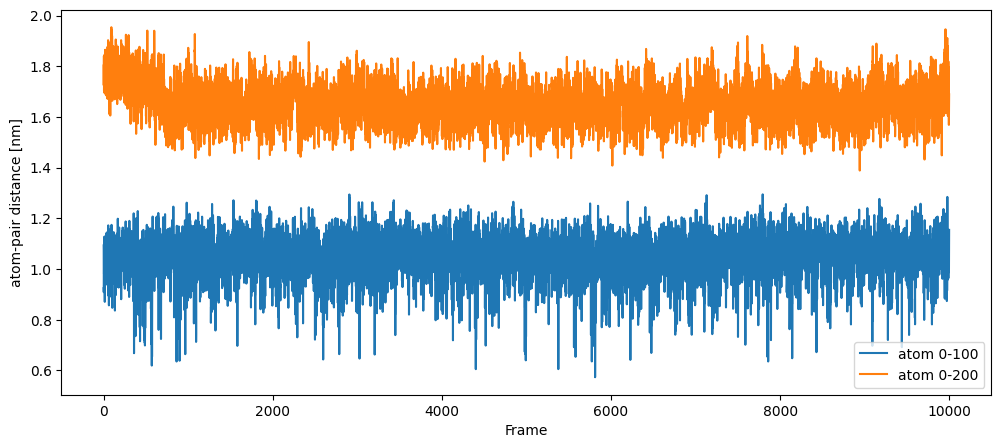

In [8]:
import matplotlib.pyplot as plt

dist = md.compute_distances(traj, [[0, 100], [0, 200]])

# Plot inter-domain distance
plt.figure(figsize=(12, 5))
plt.plot(dist)
plt.xlabel('Frame')
plt.ylabel('atom-pair distance [nm]')
plt.legend(['atom 0-100', 'atom 0-200'])
plt.show()

ドメイン間の距離を計算します

In [14]:
domain2_indices = traj.topology.select('resSeq 82 to 164')
print(domain2_indices)

[1287 1288 1289 ... 2640 2641 2642]


In [15]:
traj_domain2 = traj.atom_slice(domain2_indices)
print(traj_domain2)

<mdtraj.Trajectory with 10000 frames, 1356 atoms, 83 residues, and unitcells>


In [17]:
md.compute_center_of_mass(traj_domain2).shape

(10000, 3)

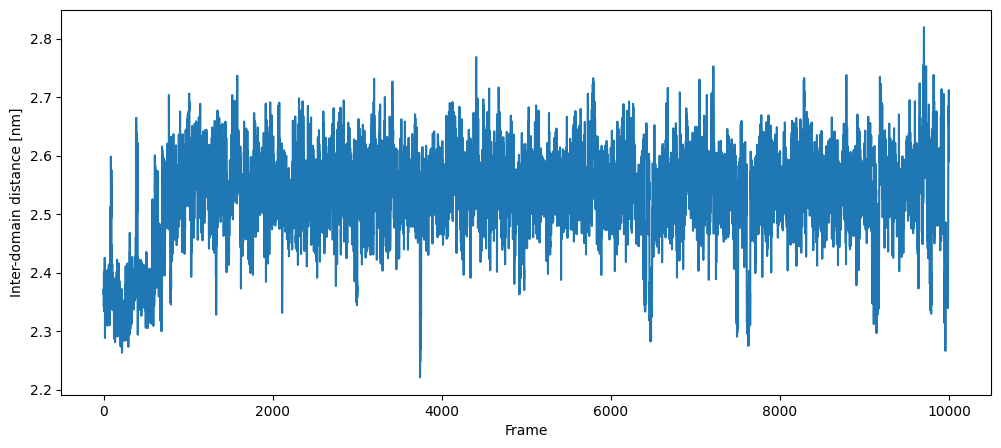

In [18]:
import matplotlib.pyplot as plt

# Define two domains using atom selections
domain1_indices = traj.topology.select('residue 1 to 60')
domain2_indices = traj.topology.select('resSeq 82 to 164')

# Compute centers of mass
domain1_com = md.compute_center_of_mass(traj.atom_slice(domain1_indices))
domain2_com = md.compute_center_of_mass(traj.atom_slice(domain2_indices))

# Calculate distance between centers of mass
com_distance = np.sqrt(np.sum((domain1_com - domain2_com)**2, axis=1))

# Plot inter-domain distance
plt.figure(figsize=(12, 5))
plt.plot(com_distance)
plt.xlabel('Frame')
plt.ylabel('Inter-domain distance [nm]')
plt.show()

トラジェクトリの一部における残基間のコンタクトの頻度を計算します

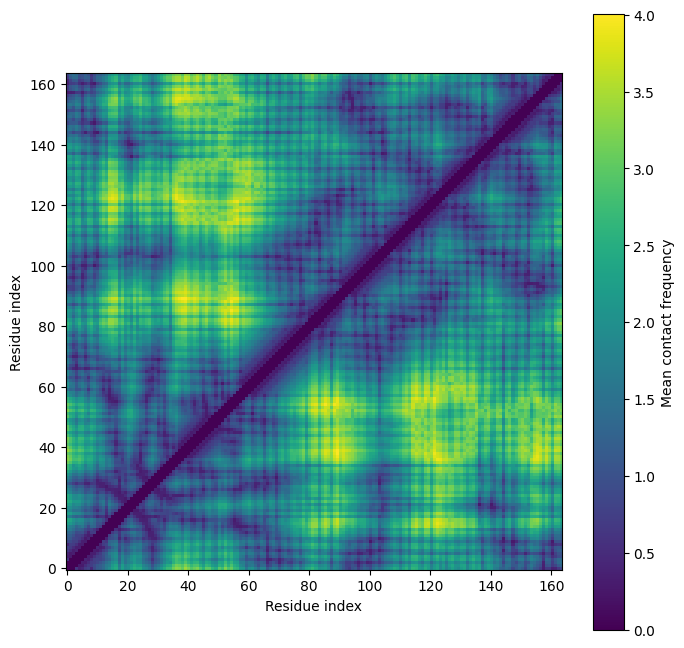

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the contact distances for each frame
distances, residue_pairs = md.compute_contacts(traj[:10], scheme='closest-heavy')

# Average over all frames to get the mean contact map
mean_distances = distances.mean(axis=0)

# Create an empty 2D array for the contact map
distance_map = np.zeros((traj.topology.n_residues, traj.topology.n_residues))

# Fill the contact map with the mean contacts
for (i, j), distance in zip(residue_pairs, mean_distances):
    distance_map[i, j] = distance
    distance_map[j, i] = distance

# Plot the contact map
plt.figure(figsize=(8, 8))
plt.imshow(distance_map, cmap='viridis', origin='lower')
plt.colorbar(label='Mean contact frequency')
plt.xlabel('Residue index')
plt.ylabel('Residue index')
plt.show()